## SIR Lab
# Spencer Halverson
# MATH 437
# 9/16/21

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp, solve_bvp
from scipy.optimize import minimize

# Problem 1

Suppose that, in a city of approximately three million, five people who have just become infectious have recently 
entered the city carrying a certain disease. Each of those individuals has one contact each day that could spread 
the disease, and an average of three days is spent in the infectious state. Find the solution of the corresponding
SIR equations using solve_ivp for fifty days, where each time period is half a day, and plot your results. Use the percentages 
of each state, not the actual number of people in the state. 

At the peak of the infection, how many in the city will still be able to work (assume for simplicity that those who are in the infectious state either cannot go to work or are unproductive, etc.)?

Hint: Use the t-values paramter in solve_ivp to pass in an array of t-values.

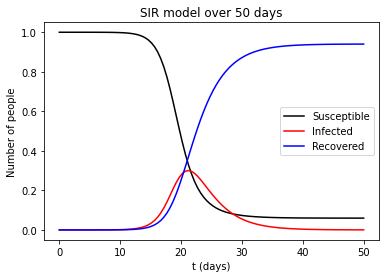

The number of people still able to work on peak infection day is: 2098830


In [2]:
def prob1():
    # y = [S, I, R]
    # y' = [-beta*S*I, beta*S*I - gamma*I, gamma*I]

    # define ode function
    def ode(t,y):
        beta = 1 # potential infections per infectious person per period (0.5 days)
        gamma = 1./3 # chance of recovering per period
        return np.array([-beta*y[0]*y[1], beta*y[0]*y[1] - gamma*y[1], gamma*y[1]]) 
    
    # initial and final times
    t0 = 0 
    tf = 50
    
    # initial conditions
    n = 3000005 # total population
    y0 = np.array([(n-5.)/n, 5./n, 0])
    
    # solve system
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 100))

    # plot
    plt.plot(sol.t, sol.y[0], label='Susceptible', color='black')
    plt.plot(sol.t, sol.y[1], label='Infected', color='red')
    plt.plot(sol.t, sol.y[2], label='Recovered', color='blue')
    plt.xlabel('t (days)')
    plt.ylabel('Number of people')
    plt.legend(loc='best')
    plt.title("SIR model over 50 days")
    plt.show()

    # print answer to problem
    peak_day = np.argmax(sol.y[1])
    print("The number of people still able to work on peak infection day is:",
          int((sol.y[0][peak_day] + sol.y[2][peak_day])*n))

prob1()

# Problem 2

On March 11, 2020, New York City had 52 confirmed cases of Covid-19. On that day New York started its 
lock-down measures. Using the following information, model what the spread of the virus could have 
been if New York did not implement any measures to curb the spread of the virus over the next 150 days:
    there are approximately 8.399 million people in New York city,
    the average case of Covid-19 lasts for 10 days, 
    and each infected person can spread the virus to 2.5 people.

Plot your results for each day.

1) At the projected peak, how many concurrent active cases are there?

2) Assuming that about 5% of Covid-19 cases require hospitalization, and using the fact that there are 
about 58,000 hospital beds in NYC, how much over capacity will the hospitals in NYC be at the projected peak?

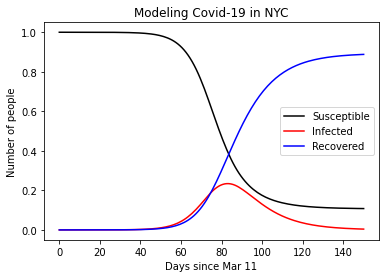

(1966483, 40324)

In [4]:
def prob2():
    '''
    Using the SIR model, plot a graph that models the
    spead of a disease in NYC and answer the questions.
    1. the projected peak concurent cases
    2. capacity deficit at the projected peak

    returns:
        ans1, ans2: answers to questions 1 and 2
    '''
    # y = [S, I, R]
    # y' = [-beta*S*I, beta*S*I - gamma*I, gamma*I]

    # define ode function
    def ode(t,y):
        beta = 2.5/10 # potential infections per infectious person per period (0.5 days)
        gamma = 1./10 # chance of recovering per period
        return np.array([-beta*y[0]*y[1], beta*y[0]*y[1] - gamma*y[1], gamma*y[1]]) 
    
    # initial and final times
    t0 = 0 
    tf = 150 
    
    # initial conditions
    n = 8399000 # total NYC population
    k = 52 # initial COVID-19 cases
    y0 = np.array([(n-k)/n, k/n, 0])
    
    # solve system
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 150))

    # plot
    plt.plot(sol.t, sol.y[0], label='Susceptible', color='black')
    plt.plot(sol.t, sol.y[1], label='Infected', color='red')
    plt.plot(sol.t, sol.y[2], label='Recovered', color='blue')
    plt.xlabel('Days since Mar 11')
    plt.ylabel('Number of people')
    plt.legend(loc='best')
    plt.title("Modeling Covid-19 in NYC")
    plt.show()

    # Find answers to problems
    peak_day = np.argmax(sol.y[1])
    peak_infection_perc = np.max(sol.y[1]) # this is a percentage
    peak_infection = int(n*peak_infection_perc)

    beds = 58000
    over_cap = int(peak_infection*0.05) - beds

    
    return peak_infection, over_cap 
prob2()

# Problem 3

There are 7 billion people in the world. Suppose that influenza originates with 1000 people, and that they are contagious for 10 days before recovering.
Also suppose that on average someone makes one contact every two days that could spread the flu.
Since we can catch a new strain of the flu, suppose that a recovered individual becomes susceptible again with probability f=1/50. To assure a steady population, let the birth rate balance out the death rate, and in particular let μ=.0001.

Using the SIRS model above, plot the proportion of population that is Susceptible, Infected, and Recovered over a year span 365 days with one point for each day.

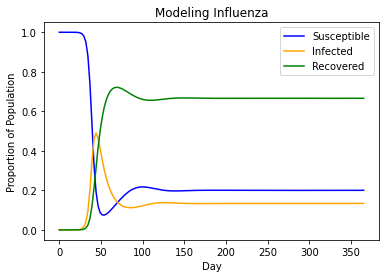

In [10]:
def prob3():
    '''
    Use the SIRS model to examine the spread of the 
    flu over the course of a year
    '''
    # y = [S, I, R]
    # y' = [f*R + mu*(1-S)-beta*S*I, beta*S*I - (gamma+mu)*I, -f*R + gamma*I - mu*R]

    # define ode function
    def ode(t,y):
        beta = 0.5 # potential infections per infectious person per day
        gamma = 1./10 # chance of recovering per period
        return np.array([f*y[2] + mu*(1-y[0])-beta*y[0]*y[1], beta*y[0]*y[1] - (gamma+mu)*y[1], -f*y[2] + gamma*y[1] - mu*y[2]]) 
    
    # initial and final times
    t0 = 0 
    tf = 365
    
    # initial conditions
    n = 7000000000 # initial world population
    k = 1000 # initial influenza cases
    mu = .0001
    f = 1./50
    y0 = np.array([(n-k)/n, k/n, 0])
    
    # solve system
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 150))

    # plot
    plt.plot(sol.t, sol.y[0], label='Susceptible', color='blue')
    plt.plot(sol.t, sol.y[1], label='Infected', color='orange')
    plt.plot(sol.t, sol.y[2], label='Recovered', color='green')
    plt.xlabel('Day')
    plt.ylabel('Proportion of Population')
    plt.legend(loc='best')
    plt.title("Modeling Influenza")
    plt.show()
    
    return 

prob3()

# Problem 4

Fit the PGED model to the Covid-19 data provided in new_york_cases.npy.
Print the optimal values of alpha and T_G, and plot your results against 1-S(t).
Use one point for each day.

In [36]:
def prob4():
    '''
    Find the best parameters to fit the PEGD model
    to the data provided in new_york_cases.npy

    Plot the data against 1-S(t)
    '''
    

    # y = [S, I, R]
    # y' = [-alpha/t*I, (alpha/t - 1/T_G)*I, 1/T_G*I]

    # initial conditions
    n = 8399000 # initial NYC population
    k = 52 # initial COVID cases
    y0 = np.array([(n-k)/n, k/n, 0])    

    # load data
    data = np.load("new_york_cases.npy")
    cases = data/n
    times = np.linspace(1., len(cases), len(cases))

    def ode(t,y, alpha, T_G):
        
        return np.array([-1*alpha/t*y[1], (alpha/t - 1/T_G)*y[1], 1/T_G * y[1]]) 

    # define function we want to minimize
    def fun(params):
        alpha, T_G = params

        t0 = 1
        tf = len(times)

        sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, tf), args=(alpha, T_G))

        diff = 1 - sol.y[0] - cases
        
        return np.linalg.norm(diff)

    p0 = (1,1)
    best = minimize(fun, p0).x
    alpha = best[0]
    T_G = best[1]

    # y = [S, I, R]
    # y' = [-alpha/t*I, (alpha/t - 1/T_G)*I, 1/T_G*I]
    
    # define ode function
    def ode(t,y, alpha, T_G):
        
        return np.array([-1*alpha/t*y[1], (alpha/t - 1/T_G)*y[1], 1/T_G * y[1]]) 
    
    
    # initial time    
    t0 = 1 
    tf = len(cases)
    
    # solve system
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf), args=(alpha, T_G))

    # plot
    plt.plot(cases, label='Data', color='blue')
    plt.plot(sol.t, 1-sol.y[0], label='1-S(t)', color='orange')
    plt.xlabel('Days since Mar 11')
    plt.ylabel('Proportion of Population')
    plt.legend(loc='best')
    plt.title("Modeling COVID-19 cases in NYC")
    plt.show()

    return 

prob4()

# Problem 5

In [39]:
def prob5():
    '''
    Use solve_bvp to model the measles boundary value
    problem
    '''
    B1 = 1
    B0 = 1575
    nu = 0.01
    lamb = 0.0279
    mu = 0.02
    t0 = 0
    tf = 1

    def ode(t, y):
        def B(t):
            return b0*(1+b1*np.cos(np.pi*2*t))

        return np.array([mu-B(t)*y[0]*y[2], B(t)*y[0]*y[2] - y[1]/lamb, y[1]/lamb - y[2]/nu, 0, 0, 0])

    def bcs(ya, yb):
        return np.stack([ya[0:3] - ya[3:], yb[0:3] - yb[3:]])

    t_span = np.linspace(t0, tf)
    y0 = np.array([0.075, 0.005, 0.001, 1,1,1])

    sol = solve_bvp(ode, bcs, t_span, y0.reshape((-1, 1))*np.ones((2, len(t_span))))

    y_plot = sol.sol(t_span)[0]

    plt.plot(t_span, y_plot)
    plt.xlabel('t')
    plt.ylabel('y')
    plt.show()
    
    
prob5()

ValueError: ignored